In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.stats as stats
import matplotlib
rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]

greens = ['#8EB897', "#004225", "#529471", "#48b5c4", "#529471"]
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
blues = ["#0d88e6", "#8ECDDD", "#22668D", "#42d4f4", ]

semi_balck = '#4F6272'

In [2]:
plt.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
results_path = "/Volumes/noamaz/modularity/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
plot_path = f"{local_base_path}/plots/all_togther"

In [4]:
corr_path = "{results_path}/{task}/{res_folder}/feature_correlation/{n_features}_features/"
baseline_path = "{results_path}/{task}/{res_folder}/random_feature_selection/{n_features}_features/"
globality_path = "{results_path}/{task}/{res_folder}/feature_globality/{n_features}_features/"


In [5]:
retina_task = "retina_xor"
num_layers = '3'
retina_n_features = 6
retina_res_folder = f"retina_{num_layers}_layers"
retina_lgbm_folder_name = 'exp_2023-11-27-15-51-15_nice_features'
retina_lgb_res_path = f"{results_path}/{retina_task}/{retina_res_folder}/lightgbm_feature_selection/{retina_lgbm_folder_name}"


In [6]:
xor_task = "xor"
num_layers = "4"
xor_n_features = 5
xor_res_folder = f"{xor_task}_{num_layers}_layers"
xor_lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
xor_lgb_res_path = f"{results_path}/{xor_task}/{xor_res_folder}/lightgbm_feature_selection/{xor_lgbm_folder_name}"

In [7]:
dig_task = "digits"
num_layers = '3'
dig_n_features = 3
dig_res_folder = f"digits_{num_layers}_layers"
dig_lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'
dig_lgb_res_path = f"{results_path}/{dig_task}/{dig_res_folder}/lightgbm_feature_selection/{dig_lgbm_folder_name}"

In [8]:
for file_name in os.listdir(retina_lgb_res_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    if '2023-12-24' in file_name:
        retina_feature_selection_res = pd.read_csv(f"{retina_lgb_res_path}/{file_name}")
        retina_feature_selection_res = retina_feature_selection_res.sort_values('num_features')
p = baseline_path.format(results_path=results_path, task=retina_task, res_folder=retina_res_folder,
                         n_features=retina_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    retina_res_baseline = pd.read_csv(f"{p}/{file_name}")
p = corr_path.format(results_path=results_path, task=retina_task, res_folder=retina_res_folder,
                     n_features=retina_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    retina_corr_baseline_res = pd.read_csv(f"{p}/{file_name}")
p = globality_path.format(results_path=results_path, task=retina_task, res_folder=retina_res_folder,
                          n_features=retina_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    retina_globality_baseline_res = pd.read_csv(f"{p}/{file_name}")
retina_all_data = [
    retina_res_baseline['mape'],
    retina_globality_baseline_res['mape'],
    retina_corr_baseline_res['mape'],
]

In [9]:
for file_name in os.listdir(xor_lgb_res_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    if '2023-12-26' in file_name:
        xor_feature_selection_res = pd.read_csv(f"{xor_lgb_res_path}/{file_name}")
        xor_feature_selection_res = xor_feature_selection_res.sort_values('num_features')
p = baseline_path.format(results_path=results_path, task=xor_task, res_folder=xor_res_folder, n_features=xor_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    xor_res_baseline = pd.read_csv(f"{p}/{file_name}")
p = corr_path.format(results_path=results_path, task=xor_task, res_folder=xor_res_folder, n_features=xor_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    xor_corr_baseline_res = pd.read_csv(f"{p}/{file_name}")
p = globality_path.format(results_path=results_path, task=xor_task, res_folder=xor_res_folder,
                          n_features=xor_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    xor_globality_baseline_res = pd.read_csv(f"{p}/{file_name}")
xor_all_data = [
xor_res_baseline['mape'],
    xor_globality_baseline_res['mape'],
    xor_corr_baseline_res['mape'],
]

In [10]:
for file_name in os.listdir(dig_lgb_res_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    if '2023-12-24' in file_name:
        dig_feature_selection_res = pd.read_csv(f"{dig_lgb_res_path}/{file_name}")
        dig_feature_selection_res = dig_feature_selection_res.sort_values('num_features')
p = baseline_path.format(results_path=results_path, task=dig_task, res_folder=dig_res_folder, n_features=dig_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    dig_res_baseline = pd.read_csv(f"{p}/{file_name}")
p = corr_path.format(results_path=results_path, task=dig_task, res_folder=dig_res_folder, n_features=dig_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    dig_corr_baseline_res = pd.read_csv(f"{p}/{file_name}")
p = globality_path.format(results_path=results_path, task=dig_task, res_folder=dig_res_folder,
                          n_features=dig_n_features)
for file_name in os.listdir(p):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    dig_globality_baseline_res = pd.read_csv(f"{p}/{file_name}")
dig_all_data = [
dig_res_baseline['mape'],
    dig_globality_baseline_res['mape'],
    dig_corr_baseline_res['mape'],
]

In [179]:
for a in xor_all_data:
    print(a.shape)

(310,)
(302,)
(510,)


In [178]:
for a in dig_all_data:
    print(a.shape)

(301,)
(188,)
(48,)


In [180]:
for a in retina_all_data:
    print(a.shape)

(300,)
(301,)
(602,)


(298,)
(301,)
(301,)
(301,)
(296,)
(301,)
(301,)
(185,)
(48,)


<Figure size 640x480 with 0 Axes>

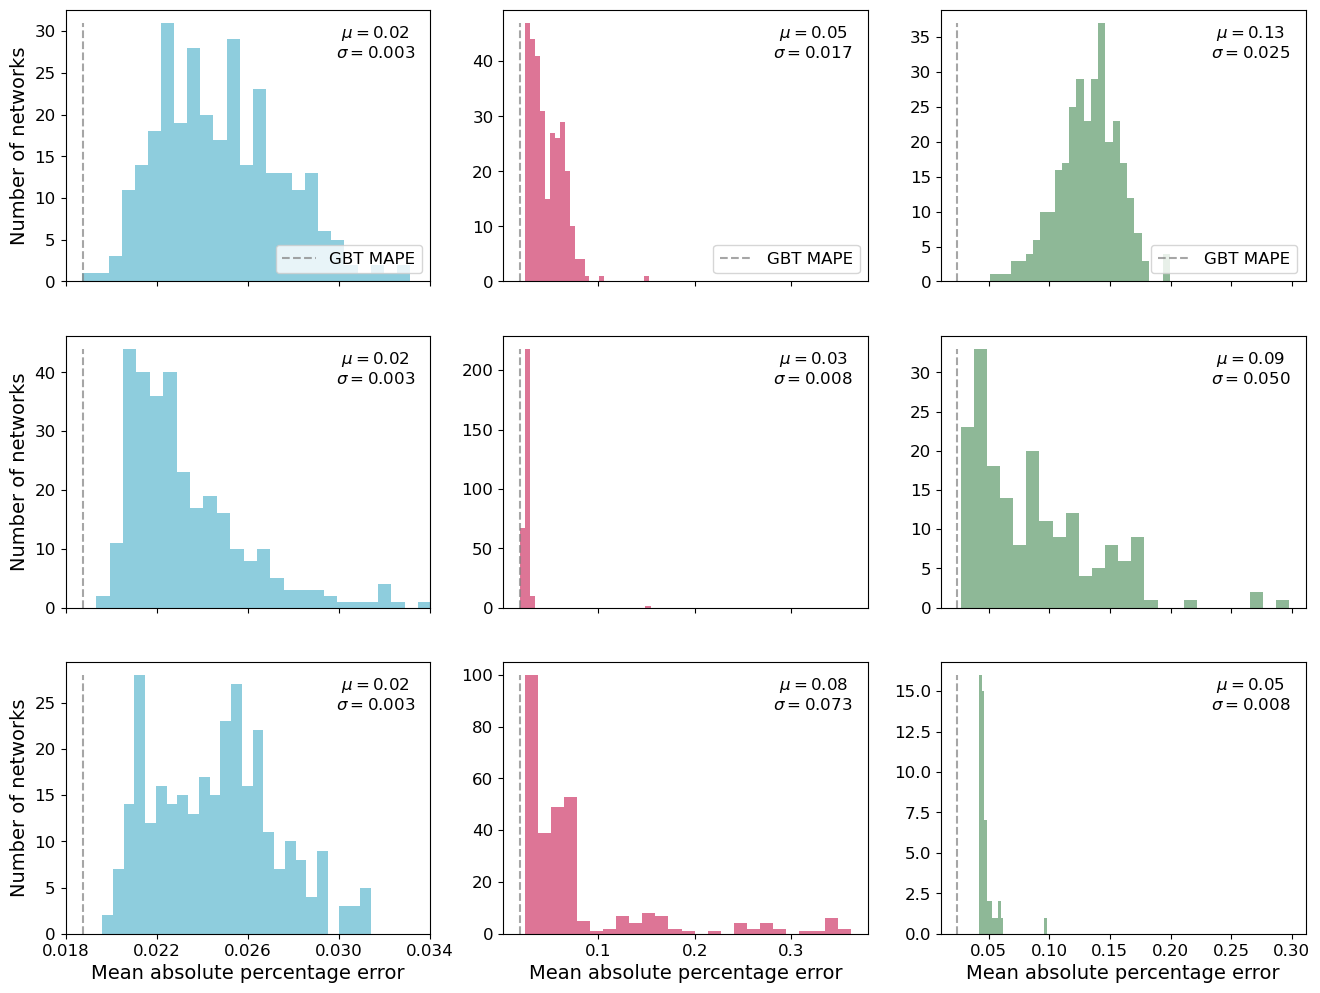

In [11]:
all_feature_sellection_val = [
    retina_feature_selection_res['test_mape'][
    retina_feature_selection_res['num_features'] == retina_n_features].item(),

        xor_feature_selection_res['test_mape'][
    xor_feature_selection_res['num_features'] == xor_n_features].item(),

        dig_feature_selection_res['test_mape'][
    dig_feature_selection_res['num_features'] == dig_n_features].item()
    ]

all_data = [

        retina_all_data,
        xor_all_data,
        dig_all_data,

]
labels = [
    'randomly chosen features',
    'globality based randomly chosen features',
    'correlation based chosen features'
]
nums = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'], ]
colors = [blues[1],rads[2] ,greens[0]]
plt.figure()
fig, axs = plt.subplots(3, 3, figsize=(16, 12), sharex='col')
for (task_baseline, feature_sellection_val, j) in zip(all_data, all_feature_sellection_val, range(axs.shape[0]), ):
    for i in range(axs.shape[1]):
        c = colors[j]
        baseline = task_baseline[i]
        baseline = baseline[baseline<=0.5]
        if j ==0:
            baseline = baseline[baseline<=0.05]
        if baseline.shape[0] > 301:
            baseline = baseline.sample(n=301, random_state = 1994)
        print(baseline.shape)
        mu, std = stats.norm.fit(baseline)
        n, _, _ = axs[i, j].hist(baseline, bins=25, alpha=1, color=c)
        #axs[i].set_title(f"{lab}", fontsize=13)
        textstr = '\n'.join((
            r'$\mu=%.2f$' % (mu),
            r'$\sigma=%.3f$' % (std)))
        axs[i,j].text(0.85,  0.95, textstr, transform=axs[i,j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center' )
        #axs[i,j].text(1.02, 0.98, nums[j][i], transform=axs[i,j].transAxes, fontsize=14, verticalalignment='top', weight="bold")
        axs[i,j].vlines(x=feature_sellection_val, ymin=0,
                      ymax=max(n), colors='grey', linestyles='--', alpha=0.7,
                      label='GBT MAPE')
        if j == 0:
            axs[i,j].set_ylabel('Number of networks', fontsize=14)
            axs[i,j].set_xticks([round(r,3) for r in np.linspace(axs[i,j].set_xlim()[0],axs[i,j].set_xlim()[1], 5)])
        if i == 2:
            axs[i,j].set_xlabel('Mean absolute percentage error', fontsize=14)
        elif i == 0:
            axs[i,j].legend(loc='lower right', fontsize=12)
        axs[i, j].tick_params(axis='both', labelsize=12)
#plt.suptitle(f'Digit recognition - performance of alternative feature selection methods', fontsize=13)
#plt.tight_layout()
plt.savefig(#
    f"{plot_path}/{time_str}_feature_swapping.png", bbox_inches='tight')
plt.show()

In [125]:
globality_level = {
    1: [
        'connectivity_ratio',
        'num_connections',
        'max_possible_connections',
        'motifs_count',
        'dimensions',
        'num_layers',
        'num_neurons'
    ],
    0.75: [
        'total_connectivity_ratio_between_layers',
        'max_connectivity_between_layers_per_layer',
        'layer_connectivity_rank',
    ],
    0.5: [
        'distances_between_input_neuron',
        'num_paths_to_output_per_input_neuron',
        'num_involved_neurons_in_paths_per_input_neuron',
    ],
    0: [
        'out_connections_per_layer',
        'in_connections_per_layer',
    ]
}


def get_glob_level(feature_full_name):
    for globality_idx, features_list in globality_level.items():
        for f in features_list:
            if f == 'connectivity_ratio' and f != feature_full_name:
                continue
            if f in feature_full_name:
                return globality_idx


In [123]:
ret_all_f_names = pd.read_csv(f"{results_path}/{retina_task}/{retina_res_folder}/all_feature_names.csv")['0'].tolist()
ret_single_feature_path = f"{results_path}/{retina_task}/{retina_res_folder}/single_feature_prediction/"
ret_single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(ret_single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{ret_single_feature_path}/{file_name}")
    feature_ind = int(file_name.split('feature_')[1].split('_best.csv')[0]) - 1
    temp['feature_ind'] = feature_ind
    feature_name = ret_all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    temp['feature_globality_level'] = get_glob_level(feature_name)
    ret_single_feature_baseline_res = pd.concat([ret_single_feature_baseline_res, temp], ignore_index=True)

In [122]:
xor_all_f_names = pd.read_csv(f"{results_path}/{xor_task}/{xor_res_folder}/all_feature_names.csv")['0'].tolist()
xor_single_feature_path = f"{results_path}/{xor_task}//{xor_res_folder}/single_feature_prediction/"
xor_single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(xor_single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{xor_single_feature_path}/{file_name}")
    feature_ind = int(file_name.split('feature_')[1].split('_best.csv')[0]) - 1
    temp['feature_ind'] = feature_ind
    feature_name = xor_all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    temp['feature_globality_level'] = get_glob_level(feature_name)
    xor_single_feature_baseline_res = pd.concat([xor_single_feature_baseline_res, temp], ignore_index=True)

In [124]:
dig_all_f_names = pd.read_csv(f"{results_path}/{dig_task}/{dig_res_folder}/all_feature_names.csv")['0'].tolist()
dig_single_feature_path = f"{results_path}/{dig_task}/{dig_res_folder}/single_feature_prediction/"
dig_single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(dig_single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{dig_single_feature_path}/{file_name}")
    feature_ind = int(file_name.split('feature_')[1].split('_best.csv')[0]) - 1
    temp['feature_ind'] = feature_ind
    feature_name = dig_all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    temp['feature_globality_level'] = get_glob_level(feature_name)
    dig_single_feature_baseline_res = pd.concat([dig_single_feature_baseline_res, temp], ignore_index=True)

<Figure size 640x480 with 0 Axes>

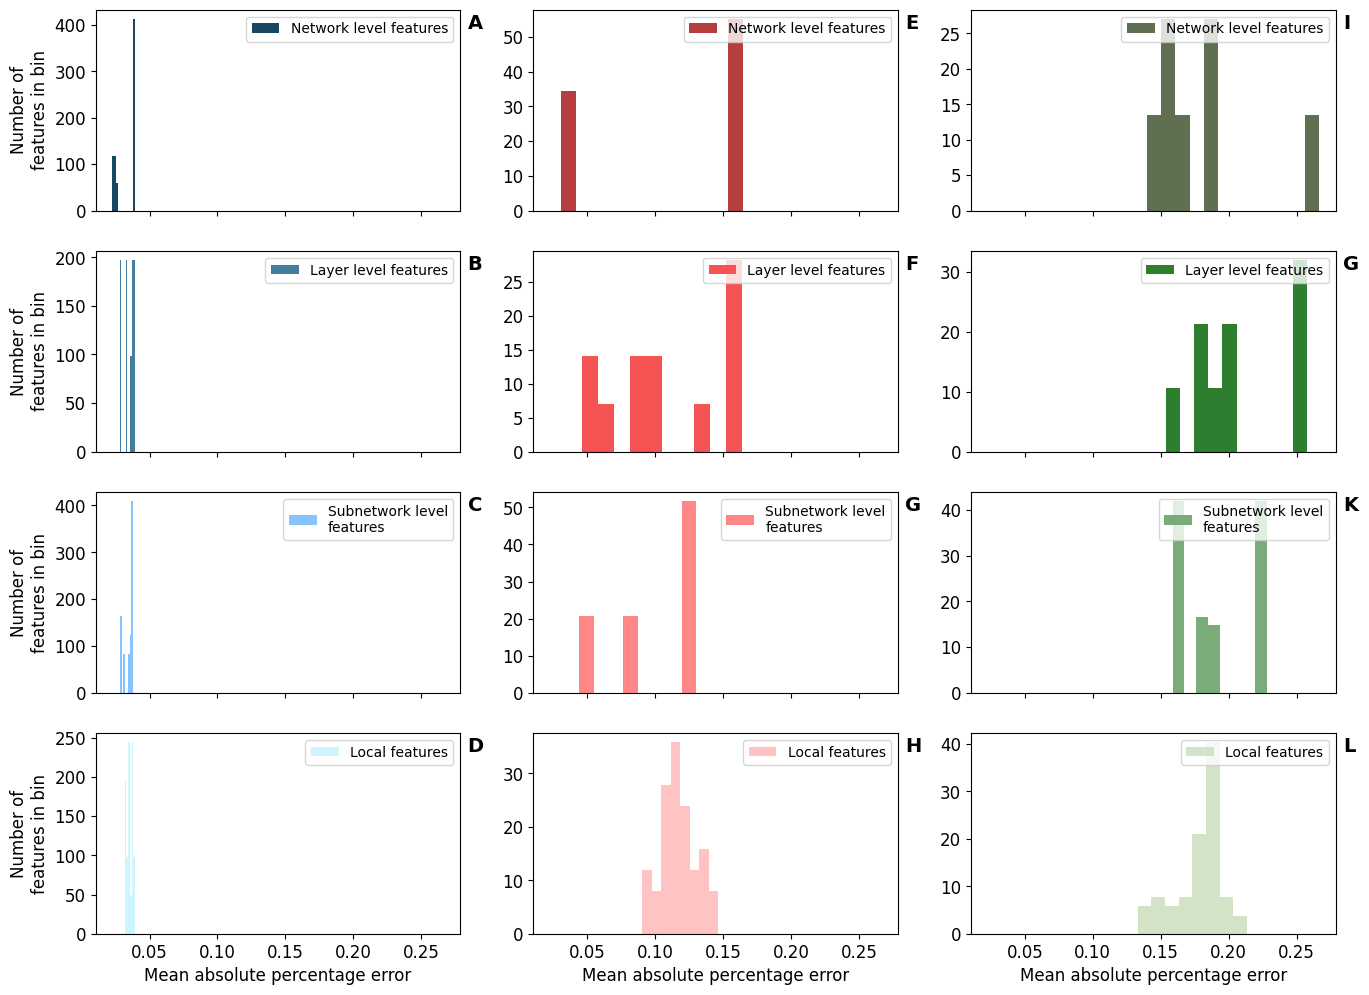

In [184]:
all_data_single = [

        ret_single_feature_baseline_res,
        xor_single_feature_baseline_res,
        dig_single_feature_baseline_res,

]
glob_levels_names =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Subnetwork level features",
    0: "Local features"
}
sorted_blues = [
"#164863",
    "#427D9D",
    "#87C4FF",
    "#CDF5FD",
]
sorted_rads = [
    "#B73E3E",
"#F55353",
    '#FF8787',
    "#FFC3C3",
     #"#e1a692",
]
sorted_greens = ["#5F6F52",
                 '#2f7e2f',
                 "#79AC78",
                 "#D2E3C8", ]

nums = [['A', 'B', 'C', 'D',], ['E', 'F', 'G', 'H',],[ 'I', 'G', 'K', 'L'], ]
colors = [sorted_blues,sorted_rads ,sorted_greens]
plt.figure()
fig, ax = plt.subplots(4, 3, figsize=(16, 12), sharex='col')
for (single_feature_baseline_res, j) in zip(all_data_single, range(ax.shape[1]), ):
    single_feature_baseline_res =single_feature_baseline_res[single_feature_baseline_res[
                                 'best mape test'] < 0.8]
    for i, g_level in zip(range(ax.shape[0]), globality_level.keys()):
            c = colors[j][i]
            if i== 0:
                bins = 12
            elif i== 1:
                bins = 10
            else:
                bins = 8
            n, p, b = ax[i,j].hist(single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level][
                                 'best mape test'], bins=bins, density=True,
                             color=c, label=textwrap.fill(glob_levels_names[g_level], width=22,
                                               break_long_words=False))

            ax[i,j].text(1.02, 0.98, nums[j][i], transform=ax[i,j].transAxes, fontsize=14, verticalalignment='top', weight="bold")
            if j==0:
                ax[i,j].set_ylabel('Number of\nfeatures in bin', fontsize=12)
            if i==3:
                ax[i,j].set_xlabel('Mean absolute percentage error', fontsize=12)

            ax[i,j].legend(loc='upper right')
            ax[i, j].tick_params(axis='both', labelsize=12)
            fig.align_ylabels(ax[j, :])

#plt.suptitle(f'Digit recognition - performance of alternative feature selection methods', fontsize=13)
#plt.tight_layout()
plt.savefig(#
    f"{plot_path}/{time_str}_single_feature_by_glob.png", bbox_inches='tight')
plt.show()

In [189]:
for single_feature_baseline_res in all_data_single:
    print(single_feature_baseline_res[single_feature_baseline_res['best mape test'] ==single_feature_baseline_res['best mape test'].min()])

    Unnamed: 0  best ephoc  best mape train  best mape test  best mse train  \
30           0         391          0.02252        0.022572        0.000028   

    best mse test  best r2 train  best r2 test  feature_ind     feature_name  \
30       0.000029       0.577285      0.580719            1  num_connections   

    feature_globality_level  
30                      1.0  
    Unnamed: 0  best ephoc  best mape train  best mape test  best mse train  \
16           0         379         0.031521        0.030557        0.000029   

    best mse test  best r2 train  best r2 test  feature_ind     feature_name  \
16       0.000028       0.934238      0.936172            1  num_connections   

    feature_globality_level  
16                      1.0  
     Unnamed: 0  best ephoc  best mape train  best mape test  best mse train  \
109           0         445         0.132439        0.133213          0.0001   

     best mse test  best r2 train  best r2 test  feature_ind  \
109         0.0

In [198]:
all_feature_sellection_val = [
    retina_feature_selection_res['test_mape'][
    retina_feature_selection_res['num_features'] == retina_n_features].item(),

        xor_feature_selection_res['test_mape'][
    xor_feature_selection_res['num_features'] == xor_n_features].item(),

        dig_feature_selection_res['test_mape'][
    dig_feature_selection_res['num_features'] == dig_n_features].item()
    ]

for single_feature_baseline_res, gbt in zip(all_data_single, all_feature_sellection_val):
    print(single_feature_baseline_res['best mape test'][single_feature_baseline_res['feature_name'] =='num_connections'])
    print(gbt)

30    0.022572
Name: best mape test, dtype: float64
0.0187454134649795
16    0.030557
Name: best mape test, dtype: float64
0.0191613554248621
134    0.15217
Name: best mape test, dtype: float64
0.0243257797442924


(2, 2)

In [146]:
single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level][
                                 'best mape test']

0      0.228238
3      0.158799
5      0.184875
6      0.160150
7      0.184373
         ...   
192    0.226501
193    0.183742
195    0.159716
196    0.184507
197    0.227554
Name: best mape test, Length: 132, dtype: float64